### 1
데이터 설명 : 학생의 다양한 주변 환경에 따른 결석 등급 (absences)

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv")
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,2
1,F,17,T,1,1,father,1,2,0,3,5,1
2,F,15,T,1,1,mother,1,2,3,3,4,3
3,F,15,T,4,2,mother,1,3,0,2,3,0
4,F,16,T,3,3,father,1,2,0,3,4,1


### 1-1
EDA를 진행하고 (+시각화) , 차원축소의 필요성이 있는지 확인 (5점)

In [2]:
df.info() # 결측치는 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.2+ KB


종속변수는 absences로 연속형 변수이고, 독립변수는 age만 양적변수이고 나머지 변수들은 질적변수(명목척도, 서열척도)이다.

In [3]:
quan = ['age']
qual = df.columns.drop(['age','absences'])

In [4]:
# 기술통계량 확인
df.describe()

,age,medu,fedu,traveltime,studytime,failures,freetime,famrel,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.944304,1.377215
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,0.896659,1.555076
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,5.000000,3.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000


In [5]:
df.describe(include = ['object'])

,sex,pstatus,guardian
count,395,395,395
unique,2,2,3
top,F,T,mother
freq,208,354,273


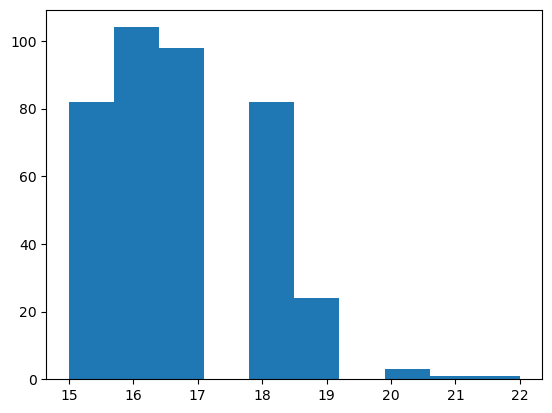

In [6]:
# 양적변수 시각화
import matplotlib.pyplot as plt
plt.hist(df['age'])
plt.show()

In [7]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

15~17 세 인원이 가장 많은 것으로 나타났고, 20세 이상 인원은 매우 적은 것으로 나타난다.

In [8]:
import warnings
warnings.filterwarnings(action= 'ignore')

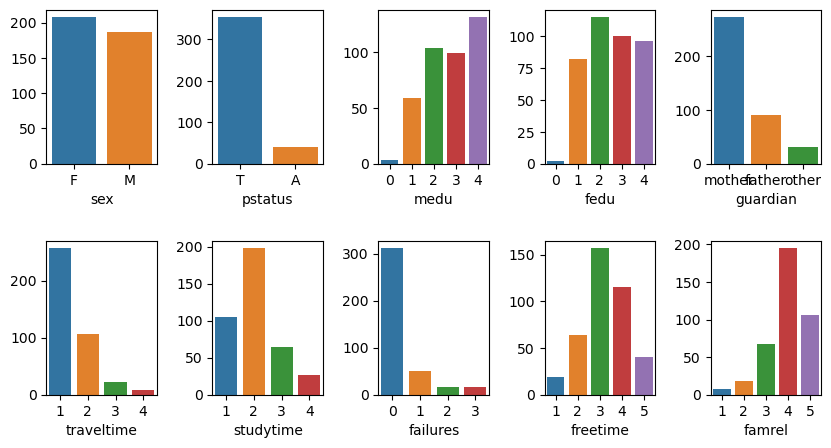

In [9]:
# 질적변수 시각화
import seaborn as sns
fig, axes = plt.subplots(2, 5, figsize = (10, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, col in enumerate(qual):
    temp = df[col].value_counts()
    sns.barplot(x = temp.index, y = temp.values, ax = axes[i // 5, i% 5])
    
plt.show()

질적변수를 통해 알 수 있는 것은 부모님 동거여부에서 동거한다의 비율이 훨씬 높고, 주 보호자는 mother, 학고여부는 0이 가장 높다.

### 1-2
데이터 품질 개선을 위한 방법이 있는지 찾고 데이터셋을 재생성하라 (5점)

sex. pstatus, guadian 변수를 인코딩이 필요하다.  
sex, pstatus 는 범주가 2개인 이진변수이고, guadian 은 범주가 3개이다.

In [10]:
df['sex'] =df['sex'].map({'F' : 0, 'M' : 1})
df['pstatus'] =df['pstatus'].map({'T' : 0, 'A' : 1})

# drop_first = True 로 설정하여 다중공선성의 영향을 줄여주겠다.
df = pd.get_dummies(df, columns = ['guardian'], drop_first=True)
df.head()

,sex,age,pstatus,medu,fedu,traveltime,studytime,failures,freetime,famrel,absences,guardian_mother,guardian_other
0,0,18,1,4,4,2,2,0,3,4,2,True,False
1,0,17,0,1,1,1,2,0,3,5,1,False,False
2,0,15,0,1,1,1,2,3,3,4,3,True,False
3,0,15,0,4,2,1,3,0,2,3,0,True,False
4,0,16,0,3,3,1,2,0,3,4,1,False,False


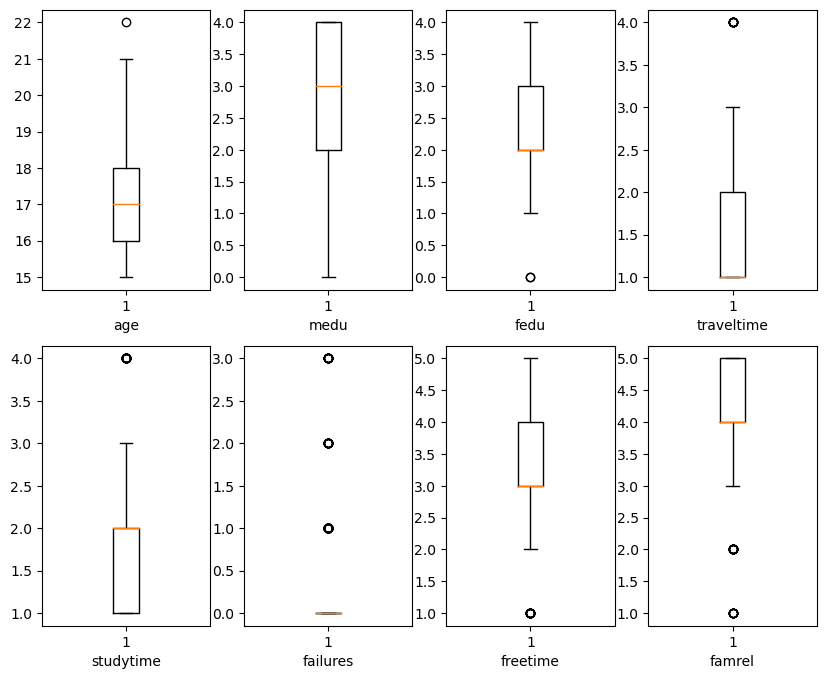

In [11]:
# 수치형 변수에 대해 boxplot 을 그려 이상치를 찾아보자
cols = df.columns.drop(['sex', 'pstatus', 'absences', 'guardian_mother', 'guardian_other'])
fig, axes = plt.subplots(2,4, figsize = (10, 8))
for i, col in enumerate(cols):
    axes[i//4, i%4].boxplot(df[col])
    axes[i//4, i%4].set_xlabel(col)

plt.show()    

순서형 변수에서 범주를 벗어나는 값은 없는 것으로 보이므로 이상치 처리를 하지 않는 것이 적절하다고 판단된다.

In [12]:
df['absences'].value_counts() # 클래스 불균형이 존재한다.

absences
0    183
4     66
1     61
3     49
2     36
Name: count, dtype: int64

클래스 불균형이 존재하므로 오버샘플링을 수행하자.

In [13]:
from imblearn.over_sampling import RandomOverSampler

# age 는 불필요한 변수로 생각되어 제거
X = df.drop(['age', 'absences'], axis = 1)
y = df['absences']

over = RandomOverSampler()
X_over, y_over = over.fit_resample(X, y)

print(y.value_counts())
print(y_over.value_counts())

absences
0    183
4     66
1     61
3     49
2     36
Name: count, dtype: int64
absences
2    183
1    183
3    183
0    183
4    183
Name: count, dtype: int64


### 1-3
1.2에서 제시한 방법이 데이터 과적합이 된다는 가정하에 어떻게 해결할 수 있을지 2가지 개선안 제시, 각방법들의 장단점 기술 (10점)

과적합을 해결하기 위한 방법으로는 차원축소와 SMOTE 오버샘플링 방법이 있다.
PCA
+ 장점 : 고차원 데이터를 저차원으로 변환하여 데이터의 크기를 줄일 수 있다. 정보의 손실을 최소화하면서 데이터를 압축할 수 있다.
+ 단점 : 선형변환을 기반으로 하기 때문에 비선형적인 데이터의 경우는 적합하지 않다. 새로운 주성분 축의 결과 해석이 어려울 수 있다.

SMOTE
+ 장점 : KNN 알고리즘을 이용해 소수 클래스 데이터를 다수 클래스 데이터의 수만큼 증가시키는 것으로 과적합을 해결할 수 있다.
+ 단점 : 고차원 데이터에는 효율적이지 않다.

### 2-1
1-2 데이터셋을 기준으로 random forest, neural network , lightgbm 3가지 방식으로 학교 결석 횟수등급을 예측하는 모델을 만들어라, f1 score로 모델을 평가하라 (5점)

In [14]:
# lgbm 은 왜 안될까나
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score
import time
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.3, random_state= 42, stratify=y_over)

In [ ]:
param_grid = {'max_depth' : [3,4,5,6], 'min_samples_split' : np.arange(2, 30, 2)}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid)
grid_rf.fit(X_train, y_train)

In [70]:
grid_rf.best_params_

{'max_depth': 6, 'min_samples_split': 2}

In [15]:
rf = RandomForestClassifier(max_depth=6, min_samples_split=2)
start = time.time()
rf.fit(X_train, y_train)
end = time.time()
y_pred_rf = rf.predict(X_test)

rf_time = end - start

In [32]:
param_grid = {'activation' : ['relu', 'tanh'], 'hidden_layer_sizes' : [(100,), (150,), (200,)]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid)
grid_mlp.fit(X_train, y_train)
grid_mlp.best_params_

In [16]:
mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(200,))
start = time.time()
mlp.fit(X_train, y_train)
end = time.time()
y_pred_mlp = mlp.predict(X_test)
mlp_time = end - start

In [17]:
param_grid = {'max_depth' : [3,4,5,6], 'learning_rate' : [0.1,0.3,0.5]}

grid_lgbm = GridSearchCV(LGBMClassifier(force_col_wise = True), param_grid)
grid_lgbm.fit(X_train, y_train)
grid_lgbm.best_params_

[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 512, number of used features: 11
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Info] Start training from score -1.603596
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Info] Start training from score -1.603596
[LightGBM] [Info] Start training from score -1.613352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

{'learning_rate': 0.3, 'max_depth': 5}

In [18]:
lgbm = LGBMClassifier(learning_rate=0.3, max_depth=5)
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
y_pred_lgbm = lgbm.predict(X_test)
lgbm_time = end - start

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [19]:
print('rf f1 score :', f1_score(y_test, y_pred_rf, average='macro'))
print('mlp f1 score :', f1_score(y_test, y_pred_mlp, average='macro'))
print('lgbm f1 score :', f1_score(y_test, y_pred_lgbm, average='macro'))

rf f1 score : 0.5914452225361821
mlp f1 score : 0.44843144793257395
lgbm f1 score : 0.7990925793786567


### 2-2
hard voting, soft voting에 대한 장단점을 설명하고 2-1의 3가지 모델로 구현하라. 두 방식의 f1-score를 비교하라 (10점)

hard voting
+ 각 분류기가 예측한 결과를 다수결로 최종 class 로 결정하는 방식
+ 장점 : 다수결로 클래스가 선택되므로 명확하다.
+ 단점 : 가장 좋은 모델이 다수결에 포함되지 않을 수 있다.

soft voting
+ 각 분류기가 예측한 확률을 평균하여 결정하는 방식
+ 장점 : 각 모델의 성능 차이에 따라 가중치를 조절할 수 있다.
+ 단점 : 가중치를 조절하는 과정이 복잡하며 개인마다 차이가 있을 수 있다.

In [21]:
from sklearn.ensemble import VotingClassifier
vo_hard = VotingClassifier(estimators=[('rf', rf), ('mlp', mlp), ('lgbm', lgbm)], voting='hard')
vo_soft = VotingClassifier(estimators=[('rf', rf), ('mlp', mlp), ('lgbm', lgbm)], voting='soft')

start = time.time()
vo_hard.fit(X_train, y_train)
end = time.time()
y_pred_hard = vo_hard.predict(X_test)
vo_hard_time = end - start

start = time.time()
vo_soft.fit(X_train, y_train)
end = time.time()
y_pred_soft = vo_soft.predict(X_test)
vo_soft_time = end - start

print('hard voting f1_score :', f1_score(y_test, y_pred_hard, average='macro'))
print('soft voting f1_score :', f1_score(y_test, y_pred_soft, average='macro'))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 44
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

### 2-3
총 5개 모델(RF, NN, LGBM, 하드보팅, 소프트보팅) 중 실시간 온라인 시스템에 가장 적합한 모델과 선정이유를 객관적으로 제시하라 (5점)

In [22]:
print('rf_time :', rf_time)
print('mlp_time :', mlp_time)
print('lgbm_time :', lgbm_time)
print('vo_hard_time :', vo_hard_time)
print('vo_soft_time :', vo_soft_time)

rf_time : 0.21314024925231934
mlp_time : 0.9565601348876953
lgbm_time : 0.11260652542114258
vo_hard_time : 1.326598882675171
vo_soft_time : 1.3393657207489014


가장 속도가 빠른 모델이 실시간 온라인 시스템에 가장 적합할 것으로 판단된다. 즉 lgbm 이 가장 좋다.

### 3-1
적정 모델과 선정 및 모델링 과정에서 추가적으로 고려해볼 만한 사항은? (5점)

적정 모델로 속도가 가장 빠른 랜덤포레스트를 선택하겠다.  
고려할 사항으로는 좀 더 높은 정확도를 위해 GridSearchCV 를 통해 최적의 파라미터를 찾으면 좋을 것으로 생각된다.

### 3-2
모델을 학교 시스템에 적용하여 활용하려한다. 모델 적용 및 운영과정에서 고려해볼 만한 사항? (5점)

새로운 데이터가 들어와도 모델 전처리를 자동으로 하고 모델에 바로 적용할 수 있도록 하는 전처리 파이프라인을 짜는 것이 필요하다.  
또한 기준을 정해 일정한 기간이 지나면 모델을 업데이트하는 식으로 하여 모델을 최신화하는 작업이 필요할 것으로 생각된다.

## 4
status : 생존 여부 (death: 죽음 / event lost: 생존)  
company : 회사구분

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p4_.csv')
df

,time(month),status,company
0,1,event lost,X
1,2,event lost,X
2,3,event lost,X
3,4,event lost,X
4,5,event lost,X
5,6,event lost,X
6,7,death,X
7,8,event lost,X
8,9,event lost,X
9,10,event lost,X


### 4-1
Kaplan Meier 방법 사용 생존분석 수행. 회사부품별 25, 35, 45 개월에서의 생존 확률 (소숫점 3자리 ,5점)

### 4-2
두 회사간 생존시간 차이를 log-rank 방식으로 검정하시오. 가설설정, 통계량, 귀무가설 기각여부 판단(10점)

## 5
한 유저가 시식 전 물건 구매의사 유,무와 시식 후 구매의사 유,무에 대한 응답을 나타낸 데이터  
{시식전} _ {구매의사 유 or 무} __ {시식후} _ {구매의사 유 or 무}

In [ ]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p5_.csv ')
df.head()

### 5-1
시식여부가 구매의사에 영향을 주는지 가설을 설정하시오(5점)

### 5-2
검정하고 결과를 분석하시오(5점)

### 6
A,B 지역 학생의 점수에 차이가 있는지 가설을 설정하고 정하시오 (10점)

In [4]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p6.csv')
df.head()

,score,school_name,ID
0,91.0,A,1
1,NaN,A,2
2,NaN,A,3
3,NaN,A,4
4,NaN,A,5


### 7-1
몸무게를 제어한다고 생각하고, 나이와 콜레스테롤 상관계수 및 유의확률 구하라(10점)

In [ ]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p7.csv')
df.head()

### 7-2
상관계수를 유의수준 0.05하에서 검정하라 (5점)